In [1]:
import geopandas as gpd

/tmp/ipykernel_1139419/3841419929.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
huc = gpd.read_file('qgis/East_of_St._Louis_1_IL/box_hucs.shp')

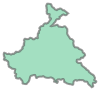

In [11]:
huc.iloc[3].geometry

In [ ]:
huc.crs

In [ ]:
type(huc.iloc[0].geometry)

In [15]:
huc_carbs = gpd.read_file('./USGS-Karst-Map/Dissolved_carbonates_seperate_polys_E_B3.shp', mask=huc.iloc[3].geometry)

<AxesSubplot: >

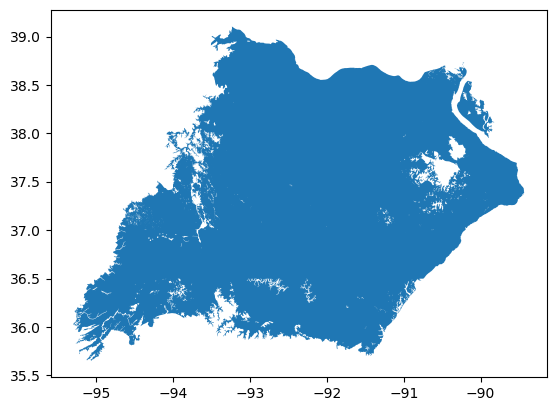

In [23]:
huc_carbs.plot()

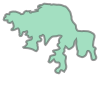

In [22]:
huc_carbs.iloc[5].geometry

In [24]:
carbs_dissolved = huc_carbs.dissolve()

In [25]:
len(huc_carbs)

6

In [38]:
from pandas import read_csv
import matplotlib.pyplot as plt 

df_untrimmed = read_csv('Combined-concat-before-karst-trim.csv', index_col=0)
df_trimmed = read_csv('Combined-concat.csv', index_col=0)

In [ ]:
df_joined = df_untrimmed.join(df_trimmed, lsuffix='untrimmed', rsuffix='trimmed')


In [ ]:

plt.loglog(df_joined.p_karstuntrimmed, df_joined.p_karsttrimmed, 'o')
plt.xlabel('Untrimmed p_karst')
plt.ylabel('Trimmed p_karst')
plt.xlim([0,0.15])
plt.ylim([0,0.15])

In [ ]:
import numpy as np

In [ ]:
df_joined[np.logical_and(df_joined.p_karsttrimmed<0.5e-4, df_joined.p_karstuntrimmed>3e-3)]

In [27]:
geom = huc.iloc[3].geometry

In [28]:
carbs_only_huc = geom.intersection(carbs_dissolved.iloc[0].geometry)

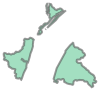

In [29]:
carbs_only_huc

In [ ]:
df = gpd.GeoDataFrame({'geometry':[carbs_only_huc]}, crs=huc.crs)
df.to_file('test-carbs-only.shp')

In [ ]:
huc.iloc[0]

In [30]:
import rasterio as rio


In [32]:
dem_src = rio.open('qgis/East_of_St._Louis_1_IL/071401010507/071401010507-3DEP.tif')

In [33]:
ndv = dem_src.nodata
ndv

nan

In [ ]:
dem_src.crs

In [56]:
ndv

nan

In [ ]:
dem_untrimmed = dem_src.read()
len(dem_untrimmed[dem_untrimmed>0])

In [35]:
import rasterio.mask as mask

out_image, out_transform = mask.mask(dem_src, [carbs_only_huc], crop=True, nodata=ndv)

In [44]:
wat_elev, wat_out_transform = rio.mask.mask(
                dem_src, [carbs_only_huc], crop=True
            )


In [45]:
wat_src = rio.open('qgis/East_of_St._Louis_1_IL/071401010507/071401010507-Combined-catchments.tif')

In [46]:
wat, wat_elev_out_transform = rio.mask.mask(
                wat_src, [carbs_only_huc], crop=True
            )

In [78]:
print(len(wat[wat>0]))
print(wat.shape[1]*wat.shape[2])
print(len(wat[wat==ndv]))
print(wat.min())
print(wat[wat==0])
print(len(wat[wat < 0]))

654005
32004414
0
-32768
[]
31350409


In [75]:
print(len(wat_elev[wat_elev>0]))
print(wat_elev.shape[1]*wat_elev.shape[2])
print(len(wat_elev[~np.isnan(wat_elev)]))
print(len(wat_elev[wat_elev != ndv]))
print(wat_elev.min())
print(wat_elev[wat_elev==0])


6794192
32004414
6794192
32004414
nan
[]


In [68]:
import numpy as np
np.isnan(wat_elev)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])

In [36]:
len(out_image[out_image>0])

6794192

In [42]:
out_image

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

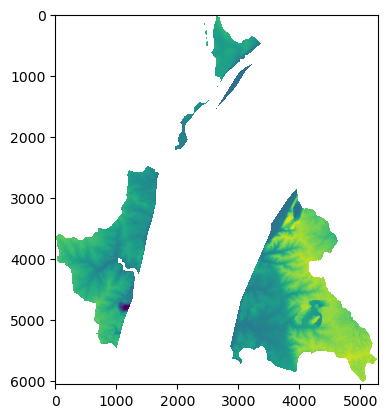

In [43]:
plt.imshow(out_image[0])

In [ ]:
import rasterio.mask as mask


In [ ]:
from whitebox.whitebox_tools import WhiteboxTools


In [ ]:
out_image, out_transform = mask.mask(dem_src, [carbs_only_huc], crop=True, nodata=ndv)

In [ ]:
plt.imshow(out_image[0])

In [ ]:
from sinkhole_functions import calc_karst_fraction

In [ ]:
calc_karst_fraction('./qgis/C-Pennsylvania_3/020503020103/','020503020103-USGS.tif', 
                    sinksfile='qgis/C-Pennsylvania_3/020503020103/020503020103-sinks-karst_depression_polys_conus.tif',
                    basefilename='test')

In [ ]:
wbt = WhiteboxTools()


In [ ]:
!ls ./qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif

In [ ]:
wbt.mean_filter('/home/mcoving/github/sinkhole_analysis/qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif', 'test-smoothed.tif', 5, 5)

In [ ]:
import os

In [ ]:
sinks_dataset = 'Combined"'
ans = input("Are you sure you want to delete all csv files for "+sinks_dataset+"? (y/n)")
print(ans)

In [ ]:
import rasterio as rio
from whitebox.whitebox_tools import WhiteboxTools
import geopandas as gpd

import os

wbt = WhiteboxTools()

datadir = './qgis/AlachuaCounty_FL_DevilsMillhopper/030801021000/'
demfile = '030801021000-USGS.tif'
sinksfile = './qgis/AlachuaCounty_FL_DevilsMillhopper/030801021000/030801021000-sinks-karst_depression_polys_conus.tif'
basefilename = '030801021000-USGS'
hucs = gpd.read_file('qgis/AlachuaCounty_FL_DevilsMillhopper/box_hucs.shp')
huc = hucs.iloc[0]

In [ ]:
os.path.join(datadir,demfile.split('-')[0]+'carbs_only_huc.shp' )

In [ ]:
datadir = os.path.abspath(datadir)
sinksfile = os.path.abspath(sinksfile)
# Define filenames
dempath = os.path.join(datadir, demfile)
pitfill_dempath = os.path.join(datadir, demfile[:-4] + "-pitfill.tif")
smoothed_dempath = os.path.join(datadir, demfile[:-4] + "-smoothed.tif")
sinkspath = os.path.join(datadir, demfile[:-4] + "-sinks.tif")
d8path = os.path.join(datadir, demfile[:-4] + "-d8.tif")
watershedspath = os.path.join(datadir, basefilename + "-catchments.tif")


In [ ]:
wbt.mean_filter(dempath, smoothed_dempath, 5, 5)

In [ ]:
wbt.fill_single_cell_pits(smoothed_dempath, pitfill_dempath)

In [ ]:
sinkspath= sinksfile

In [ ]:
wbt.d8_pointer(pitfill_dempath, d8path)

In [ ]:
wbt.watershed(d8path, sinkspath, watershedspath)


In [ ]:
wat_src = rio.open(watershedspath)
wat = wat_src.read()
dem_src = rio.open(dempath)
wat_elev = dem_src.read()
ndv = dem_src.nodata


In [ ]:
huc_geom = huc.geometry
huc_carbs = gpd.read_file('./USGS-Karst-Map/Dissolved_carbonates_E_B3.shp', mask=huc_geom)

In [ ]:
huc_carbs.iloc[0].geometry

In [ ]:
carbs_dissolved = huc_carbs.dissolve()


In [ ]:
type(huc_geom)

In [ ]:
carbs_only_huc = huc_geom.intersection(carbs_dissolved.iloc[0].geometry)

In [ ]:
carbs_only_huc


In [ ]:
huc_geom

In [ ]:
wat_elev, wat_out_transform = rio.mask.mask(dem_src, [carbs_only_huc], crop=True)
wat, wat_elev_out_transform = rio.mask.mask(wat_src, [carbs_only_huc], crop=True)


In [ ]:
plt.imshow(wat[0])

In [ ]:
nkarst = len(wat[wat > 0])
ntotal = len(wat_elev[wat_elev != ndv])
nfluvial = ntotal - nkarst
print("n karst draining pixels =", nkarst)
print("n fluvial draining pixels =", nfluvial)
p_karst = nkarst / (nkarst + nfluvial)
print("percent karst =", p_karst)

In [ ]:
import os

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd
from karstification import calc_karstification_for_HU12
from pandas import read_excel
from pynhd import pynhd
import py3dep
from shapely import box
import os
import sys
import string
import warnings
import multiprocessing
import pickle
from random import randint
import time
import argparse
from functools import partial


hr = pynhd.NHDPlusHR("huc12")
huc12 = pynhd.WaterData("wbd12", crs="epsg:4326")
box_df = read_excel("bounding_boxes.xlsx")
# box_df = read_excel("bounding_boxes_small.xlsx")
bbox_zip = zip(box_df.x_min, box_df.y_min, box_df.x_max, box_df.y_max)
project_dir = "./qgis"


In [ ]:
for i, bbox in enumerate(bbox_zip):
    if bbox[2] < bbox[0]:
        print('fixing x')
        # X min and max are switched
        bbox = (bbox[2], bbox[1], bbox[0], bbox[3])
    if bbox[3] < bbox[1]:
        print('fixing y')
        # X min and max are switched
        bbox = (bbox[0], bbox[3], bbox[2], bbox[1])
    print('i=',i, bbox)
    huc12.bybox(bbox)

In [ ]:
avail = py3dep.check_3dep_availability(bbox)

In [ ]:
huc12.bybox(bbox)

In [ ]:
carbs_dissolved

In [ ]:
box_list = []
for box in bbox_zip:
    box_list.append(box)

In [ ]:
box_list

In [ ]:
bbox_zip